# Большая лабораторная работа по курсу ОСНОВЫ МАШИННОГО ОБУЧЕНИЯ
# Intelligent Placer

In [ ]:
!pip install -r requirements.txt

In [4]:
import cv2
import matplotlib.pyplot as plt
from intelligent_placer_lib.intelligent_placer import compress_image, prepare_image, find_contours, separate_polygon, draw_contours, make_full_placement, intelligent_placer

Загружаем изображение.

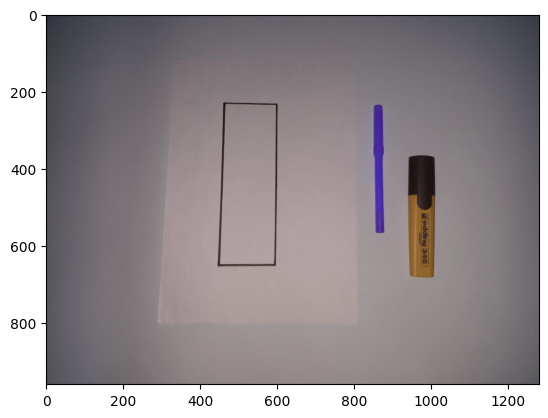

In [5]:
image = cv2.imread('cases\\case14.jpg')
plt.imshow(image)

# Подготовка изображения
Сжатие, изменение цветовой палитры и бинаризация изображения с помощью детектора Canny и морфологических операций.

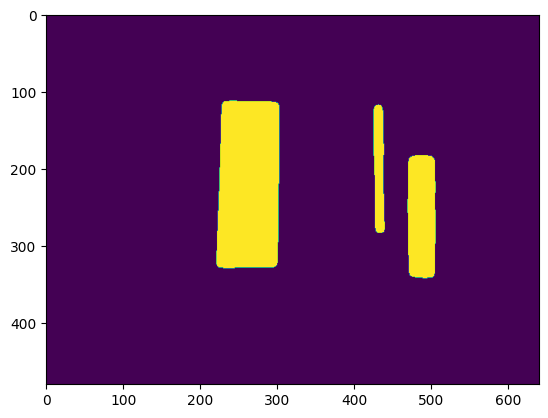

In [32]:
compressed_image = compress_image(image)
binary_image = prepare_image(compressed_image)
plt.imshow(binary_image)

# Нахождение контуров
Находим контуры на иображении с помощью функции findContours из cv2.

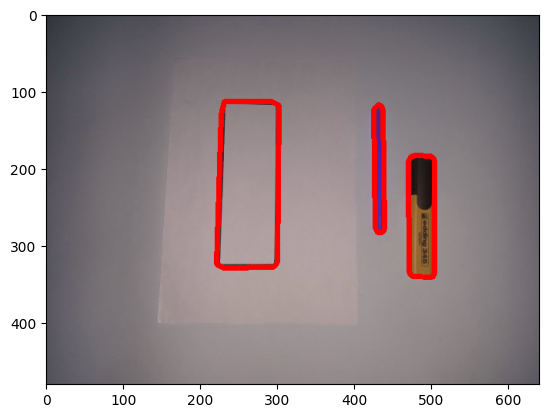

In [4]:
contours = find_contours(binary_image)
red_color = (255, 0, 0)

for curr_object in contours:
    draw_contours(compressed_image, curr_object, red_color, 5)
plt.imshow(compressed_image)

# Идентификация
Отделяем многоугольник от предметов.

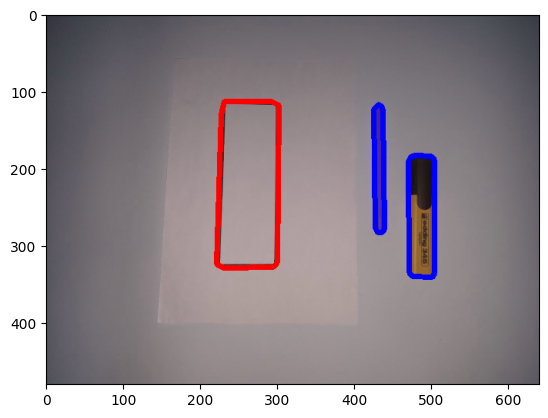

In [5]:
polygon, objects = separate_polygon(contours)

draw_contours(compressed_image, polygon, red_color, 5)
blue_color = (0, 0, 255)
for curr_object in objects:
    draw_contours(compressed_image, curr_object, blue_color, 5)
plt.imshow(compressed_image)

# Размещение
Пробуем уместить предметы в многоугольник.

In [25]:
found_placement, placed_objects = make_full_placement(polygon, objects)
print(found_placement)

True


Визуализируем размещение.

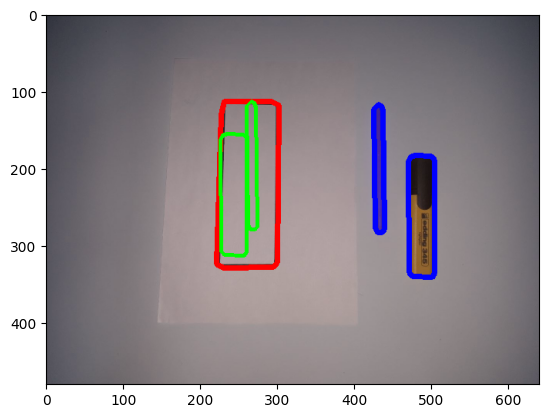

In [7]:
green_color = (0, 255, 0)
for curr_object in placed_objects:
    draw_contours(compressed_image, curr_object, green_color, 3)
plt.imshow(compressed_image)

# Результаты и метрики качества работы

Программа была опробована на всем датасете. На 21 изображение в датасете пришлось 3 ошибки алгоритма.

![results_tabl](image.png)

![calc_metrics](metrics.png)


Убедимся, что исход работы алгоритма не зависит от начального положения предметов относительно друг друга.

Yes


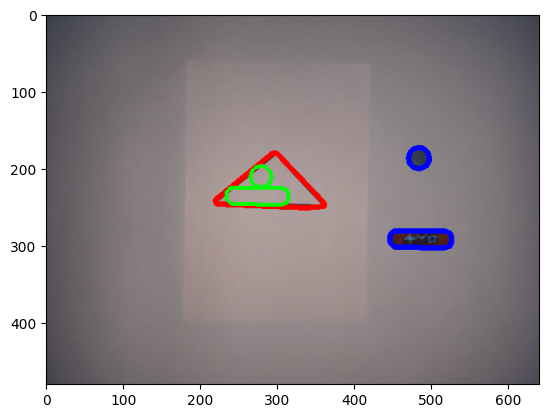

In [10]:
intelligent_placer('cases\\case6.jpg')

Yes


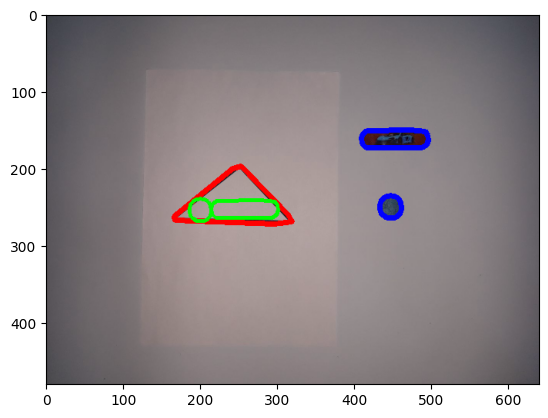

In [11]:
intelligent_placer('cases\\case6_1.jpg')

Проверим, как будет меняться время в зависимости от количества предметов, взяв 5 кейсов с разным числом идентичных предметов.

Yes
--- 0.37499475479125977 seconds ---


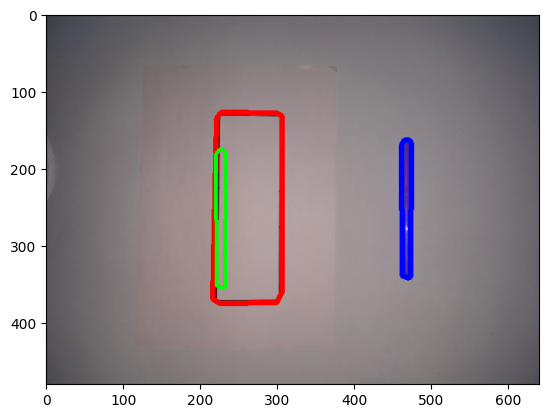

In [19]:
import time
start_time = time.time()
intelligent_placer('cases\\case20_1.jpg')
curr_time1 = time.time()
print("--- %s seconds ---" % (curr_time1 - start_time))

Yes
--- 0.906240701675415 seconds ---


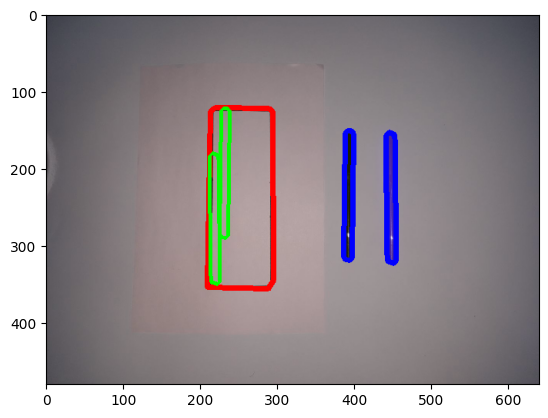

In [20]:
start_time = time.time()
intelligent_placer('cases\\case20_2.jpg')
curr_time2 = time.time()
print("--- %s seconds ---" % (curr_time2 - start_time))

Yes
--- 2.1093568801879883 seconds ---


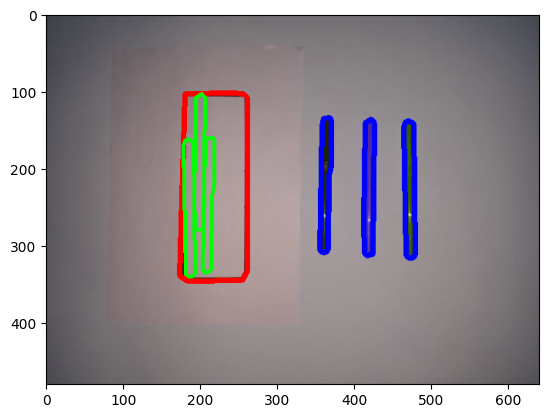

In [22]:
start_time = time.time()
intelligent_placer('cases\\case20_3.jpg')
curr_time3 = time.time()
print("--- %s seconds ---" % (curr_time3 - start_time))

Yes
--- 3.6615872383117676 seconds ---


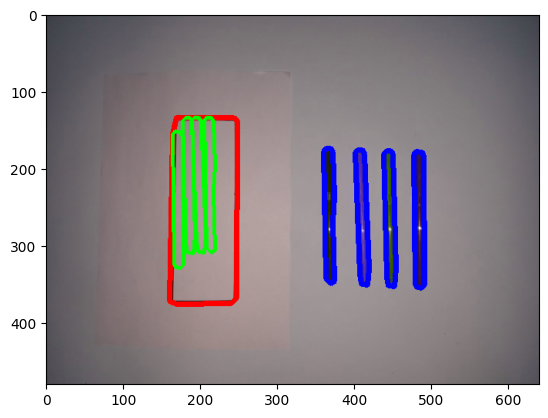

In [27]:
start_time = time.time()
intelligent_placer('cases\\case20_4.jpg')
curr_time4 = time.time()
print("--- %s seconds ---" % (curr_time4 - start_time))

Yes
--- 7.719259023666382 seconds ---


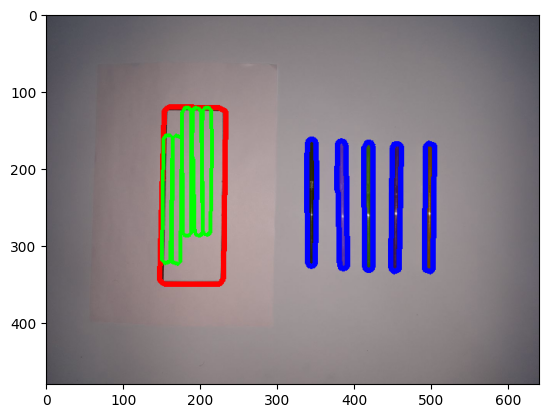

In [28]:
start_time = time.time()
intelligent_placer('cases\\case20_5.jpg')
curr_time5 = time.time()
print("--- %s seconds ---" % (curr_time5 - start_time))

Построим график.

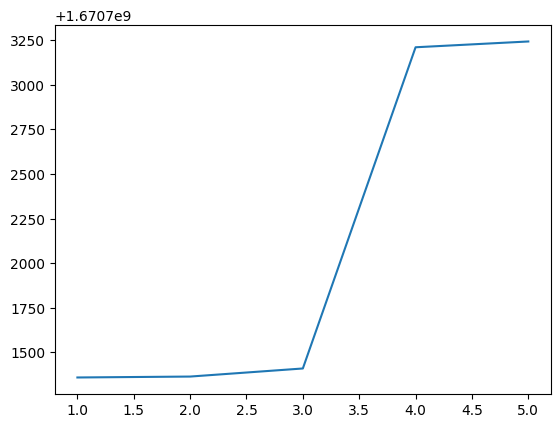

In [29]:
plt.plot([1,2,3,4,5],[curr_time1,curr_time2,curr_time3, curr_time4, curr_time5])
plt.show()